In [1]:
# 사용하는 폴더 지정
ROOT_FOLDER = '/root/jupyter_home/YOLOv8_Object_Detection'

In [2]:
!mkdir $ROOT_FOLDER

In [3]:
cd $ROOT_FOLDER

/root/jupyter_home/YOLOv8_Object_Detection


In [ ]:
# Pythorch 설치
# conda install pytorch torchvision torchaudio pytorch-cuda=11.8 -c pytorch -c nvidia

In [5]:
# 정상적으로 설치가 됐는지 일단 확인부터 해요!
import torch

print(torch.__version__)
print("CUDA 사용가능여부 :", torch.cuda.is_available())
print("GPU 이름 :", torch.cuda.get_device_name(0))

2.5.1
CUDA 사용가능여부 : True
GPU 이름 : NVIDIA GeForce RTX 3070 Ti Laptop GPU


In [ ]:
#YOLOv8을 설치
!pip install ultralytics

In [ ]:
# 설치가 끝나면 2가지 형태로 사용할 수 있어요!
# 1. YOLO라는 실행명령어를 이용해서 탐지와 학습을 할 수 있어요! (추천)
# 2. Python 코드로 직접 모델 생성하고 학습, 탐지하는 작업을 수행

In [ ]:
# 먼저 console에서 직접 사용해 볼거에요!
# 탐지할 이미지가 있어야 해요!
# 이미지 2장 준비해서 YOLOv8_Object_Detection에 가져다 놓아요!
# dog.jpg와 fire.jpg 두 개 이용해보도록 해요!

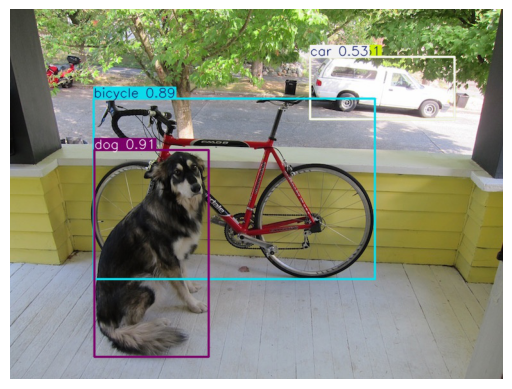

In [7]:
# yolo predict model=yolov8n.pt source='./dog.jpg'
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('./runs/detect/predict/dog.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

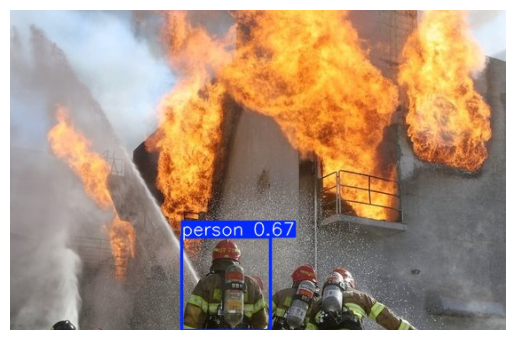

In [8]:
# yolo predict model=yolov8n.pt source='./fire.jpg'
img = mpimg.imread('./runs/detect/predict2/fire.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
# 당연히 재학습에 필요한 이미지가 있어야 하구요!!!
# YOLO data format으로 되어있는 txt파일이 있어야 해요!
# 폴더를 다음과 같이 구성해 보아요!
# YOLO8_Object_Detection 폴더 아래에
# datasets/fire_dataset 폴더를 만들거에요!
# fire_dataset 촐더 아래에 images와 labels 폴더를 각각 만들거에요!

In [9]:
cd $ROOT_FOLDER

/root/jupyter_home/YOLOv8_Object_Detection


In [11]:
# 재학습을 하기 위해서 폴더 구조를 만들어요!
!mkdir $ROOT_FOLDER/datasets
!mkdir -p datasets/fire_dataset

!mkdir -p datasets/fire_dataset/images
!mkdir -p datasets/fire_dataset/labels

!mkdir -p datasets/fire_dataset/images/train
!mkdir -p datasets/fire_dataset/images/val

!mkdir -p datasets/fire_dataset/labels/train
!mkdir -p datasets/fire_dataset/labels/val

In [13]:
# 클래스 목록에 대한 파일이 있어야 해요!
# fire.names 파일을 생성할거에요.
# YOLOv8_Object_Detection 폴더에 생성
# 내가 가지고 있는 불 이미지의 설명이 xml로 되어 있어요!
# xml로 되어있는 데이터 포맷을 YOLO형식으로 변환해야해요!
# 수작업으로는 못해요! 프로그램을 이용해서 변환시키는 방법을 사용!
# ROOT_FOLDER를 기준으로 프로그램을 다운로드 받아요!
!git clone https://github.com/ssaru/convert2Yolo.git

Cloning into 'convert2Yolo'...
remote: Enumerating objects: 215, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 215 (delta 38), reused 35 (delta 35), pack-reused 172 (from 1)
Receiving objects: 100% (215/215), 994.67 KiB | 4.92 MiB/s, done.
Resolving deltas: 100% (95/95), done.


In [14]:
!cp /root/jupyter_home/YOLO_Object_Detection/Fire/fire-dataset.zip .

In [ ]:
!unzip fire-dataset.zip

In [16]:
!cp -r $ROOT_FOLDER/fire-dataset/train/images/* $ROOT_FOLDER/datasets/fire_dataset/images/train/
!cp -r $ROOT_FOLDER/fire-dataset/validation/images/* $ROOT_FOLDER/datasets/fire_dataset/images/val/

In [17]:
cd $ROOT_FOLDER/convert2Yolo

/root/jupyter_home/YOLOv8_Object_Detection/convert2Yolo


In [18]:
!python3 example.py \
--datasets VOC \
--img_path $ROOT_FOLDER/fire-dataset/train/images/ \
--label $ROOT_FOLDER/fire-dataset/train/annotations/ \
--convert_output_path $ROOT_FOLDER/datasets/fire_dataset/labels/train/ \
--img_type ".jpg" \
--manifest_path $ROOT_FOLDER/ \
--cls_list_file $ROOT_FOLDER/fire.names


VOC Parsing:   |████████████████████████████████████████| 100.0% (412/412)  Complete


YOLO Generating:|████████████████████████████████████████| 100.0% (412/412)  Complete


YOLO Saving:   |████████████████████████████████████████| 100.0% (412/412)  Complete



In [19]:
!python3 example.py \
--datasets VOC \
--img_path $ROOT_FOLDER/fire-dataset/validation/images/ \
--label $ROOT_FOLDER/fire-dataset/validation/annotations/ \
--convert_output_path $ROOT_FOLDER/datasets/fire_dataset/labels/val/ \
--img_type ".jpg" \
--manifest_path $ROOT_FOLDER/ \
--cls_list_file $ROOT_FOLDER/fire.names


VOC Parsing:   |████████████████████████████████████████| 100.0% (90/90)  Complete


YOLO Generating:|████████████████████████████████████████| 100.0% (90/90)  Complete


YOLO Saving:   |████████████████████████████████████████| 100.0% (90/90)  Complete



In [ ]:
# 학습용 이미지와 txt파일, 검증용 이미지와 txt파일을 만들었어요!
# 마지막으로 설정파일 하나만 만들면 되요!
# $ROOT_FOLDER/data.yaml

# data.yaml 
# path: /root/jupyter_home/YOLOv8_Object_Detection/datasets/fire_dataset

# train: images/train
# val: images/val

# nc: 1
# names: ['fire']

In [ ]:
# 설정파일을 만들었으면 이제 console에서 재학습을 시켜보아요!
# yolo detect train model=yolov8n.yaml 
#        data=/root/jupyter_home/YOLO8_Object_Detection/data.yaml 
#        epochs=50 
#        imgsz=640 
#        batch=16 
#        device=0

In [22]:
cd $ROOT_FOLDER

/root/jupyter_home/YOLOv8_Object_Detection


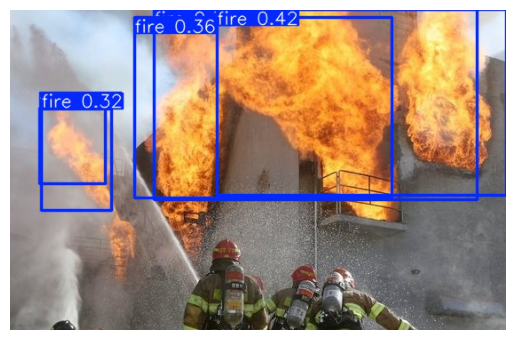

In [23]:
# 학습이 끝났으니 이제 fire.jpg를 predict해 보아요!
# yolo detect predict model=runs/detect/train/weights/best.pt source=./fire.jpg
img = mpimg.imread('./runs/detect/predict3/fire.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

In [24]:
cd $ROOT_FOLDER

/root/jupyter_home/YOLOv8_Object_Detection



0: 416x640 1 person, 51.3ms
Speed: 6.7ms preprocess, 51.3ms inference, 121.9ms postprocess per image at shape (1, 3, 416, 640)


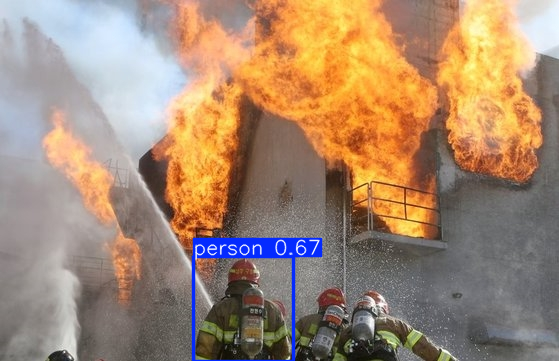

In [25]:
# 이전까지는 YOLO를 사용하는 입장에서 yolo 명령을 이용해서 처리!
# 이번에는 똑같은 작업을 code로 표현해 보아요!
import cv2
import torch
from ultralytics import YOLO

# Model Loading
model = YOLO('yolov8n.pt')

# Image Loading
img = cv2.imread('./fire.jpg')

# Predict
result = model(img)

# Visualization
result[0].show()

In [ ]:
# 그러면 재학습은 어떻게 해야하나요?
model = YOLO('yolov8n.pt')

# 재학습
results = model.train(
    data='data.yaml',
    epochs=50,
    imgsz=640,
    batch=16,
    device=0,
    workers=4,
    name='yolov8_fire'
)
# Speed: 0.4ms preprocess, 1.3ms inference, 0.0ms loss, 1.6ms postprocess per image
# Results saved to runs/detect/yolov8_fire


0: 416x640 9 fires, 27.5ms
Speed: 2.6ms preprocess, 27.5ms inference, 3.9ms postprocess per image at shape (1, 3, 416, 640)


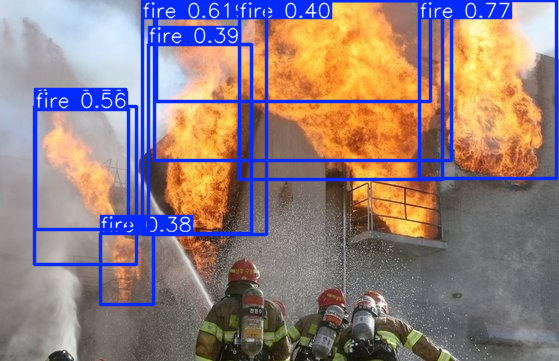

In [29]:
import cv2
import torch
from ultralytics import YOLO

mdoel = YOLO('runs/detect/yolov8_fire/weights/best.pt')

img = cv2.imread('./fire.jpg')

results = model(img)

results[0].show()